In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv(r'C:\Users\Varshith\Desktop\homeworks\spam (1)\spam.train.dat', header=None, delim_whitespace="\t")
df_test = pd.read_csv(r'C:\Users\Varshith\Desktop\homeworks\spam (1)\spam.test.dat', header=None, delim_whitespace="\t")

In [3]:
# column_name1 = 'WordFreq'
# for i, column_name in enumerate(df_train.columns[:48],start = 1):
#     new_column_name = f'{column_name1}{i}'
#     df_train.rename(columns={column_name: new_column_name}, inplace=True)
# column_name2 = 'CharFreq'
# for i, column_name in enumerate(df_train.columns[48:54],start = 1):
#     new_column_name = f'{column_name2}{i}'
#     df_train.rename(columns={column_name: new_column_name}, inplace=True)
# df_train.rename(columns = {'1.864' : 'capital_run_length_average'}, inplace=True)
# df_train.rename(columns = {'32': 'capital_run_length_longest'}, inplace = True)
# df_train.rename(columns = {'910': 'capital_run_length_total'}, inplace = True)
# df_train.rename(columns = {'0.42': 'spam'}, inplace = True)

In [4]:
# column_name1 = 'WordFreq'
# for i, column_name in enumerate(df_test.columns[:48],start = 1):
#     new_column_name = f'{column_name1}{i}'
#     df_test.rename(columns={column_name: new_column_name}, inplace=True)
# column_name2 = 'CharFreq'
# for i, column_name in enumerate(df_test.columns[48:54],start = 1):
#     new_column_name = f'{column_name2}{i}'
#     df_test.rename(columns={column_name: new_column_name}, inplace=True)
# df_test.rename(columns = {'1.888' : 'capital_run_length_average'}, inplace=True)
# df_test.rename(columns = {'5': 'capital_run_length_longest'}, inplace = True)
# df_test.rename(columns = {'17': 'capital_run_length_total'}, inplace = True)
# df_test.rename(columns = {'0.54': 'spam'}, inplace = True)

In [5]:
X_train = df_train.drop(columns=[df_train.columns[-1]]).values
X_test = df_train[[df_train.columns[-1]]].values
Y_train = df_test.drop(columns=[df_test.columns[-1]]).values
Y_test = df_test[[df_test.columns[-1]]].values

In [6]:
def do_nothing(train, test) :
    return train, test

In [7]:
def do_std(train, test): 
    scaler = StandardScaler() 
    scaler.fit(train)
    train_std = scaler.transform(train)
    test_std = scaler.transform(test)
    return train_std, test_std

In [8]:
def do_log(train, test):
    train = np.log(train + 0.1)
    test = np.log(test + 0.1)
    return train, test

In [9]:
X_train_log, Y_train_log = do_log(X_train, Y_train)

In [10]:
def do_bin(train, test): 
    train = np.where(train > 0, 1, 0)
    test = np.where(test > 0, 1, 0)
    return train, test

In [11]:
def eval_nb(trainx, trainy, testx, testy):
    model = GaussianNB()
    trainx, testx = do_nothing(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:, 1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred),
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:, 1]),
    'test-acc': accuracy_score(testy, test_pred), 
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [12]:
def eval_nb_std(trainx, trainy, testx, testy):
    model = GaussianNB()
    trainx, testx = do_std(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:, 1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred),
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:, 1]),
    'test-acc': accuracy_score(testy, test_pred), 
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }

    return results

In [13]:
def eval_nb_log(trainx, trainy, testx, testy):
    model = GaussianNB()
    trainx, testx = do_log(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:, 1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred),
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:, 1]),
    'test-acc': accuracy_score(testy, test_pred), 
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [14]:
def eval_nb_bin(trainx, trainy, testx, testy):
    model = GaussianNB()
    trainx, testx = do_bin(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:, 1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred),
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:, 1]),
    'test-acc': accuracy_score(testy, test_pred), 
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results
eval_nb_bin(X_train, X_test, Y_train, Y_test)

{'train-acc': 0.7986666666666666,
 'train-auc': 0.9494114399770172,
 'test-acc': 0.8001249219237976,
 'test-auc': 0.9447306444493846,
 'test-prob': array([9.76430187e-001, 0.00000000e+000, 2.87267109e-027, ...,
        1.00000000e+000, 2.21428605e-217, 9.76430187e-001]),
 'tpr': array([0.        , 0.71775417, 0.72685888, 0.73141123, 0.73444613,
        0.74203338, 0.74658574, 0.75569044, 0.75720789, 0.76024279,
        0.76024279, 0.76631259, 0.76631259, 0.7693475 , 0.77086495,
        0.77086495, 0.7723824 , 0.7723824 , 0.7754173 , 0.7814871 ,
        0.78300455, 0.78300455, 0.784522  , 0.784522  , 0.7875569 ,
        0.78907436, 0.79210926, 0.79362671, 0.79362671, 0.79666161,
        0.80121396, 0.80576631, 0.80576631, 0.80728376, 0.80728376,
        0.80728376, 0.81638847, 0.81638847, 0.81790592, 0.81790592,
        0.82094082, 0.82094082, 0.82701062, 0.82701062, 0.83004552,
        0.83611533, 0.84218513, 0.84218513, 0.84522003, 0.84522003,
        0.84825493, 0.84977238, 0.8497723

In [15]:
a= eval_nb(X_train, X_test, Y_train, Y_test)
a

{'train-acc': 0.8253333333333334,
 'train-auc': 0.9467277602422963,
 'test-acc': 0.8169893816364772,
 'test-auc': 0.9422708278966071,
 'test-prob': array([1.00000000e+00, 0.00000000e+00, 2.72769285e-46, ...,
        1.00000000e+00, 3.84659463e-85, 1.00000000e+00]),
 'tpr': array([0.        , 0.81942337, 0.81942337, 0.82094082, 0.83004552,
        0.83004552, 0.83156297, 0.83459788, 0.83915023, 0.83915023,
        0.84370258, 0.84522003, 0.84825493, 0.84977238, 0.85735964,
        0.85887709, 0.86191199, 0.86342944, 0.86494689, 0.86798179,
        0.86798179, 0.86949924, 0.87101669, 0.87101669, 0.87253414,
        0.87405159, 0.87556904, 0.87556904, 0.87860395, 0.87860395,
        0.8801214 , 0.8801214 , 0.8801214 , 0.8801214 , 0.8801214 ,
        0.8801214 , 0.8831563 , 0.8831563 , 0.88467375, 0.88467375,
        0.8861912 , 0.8861912 , 0.88770865, 0.88770865, 0.89074355,
        0.89074355, 0.892261  , 0.892261  , 0.892261  , 0.892261  ,
        0.89377845, 0.89377845, 0.89681335, 0.8

In [16]:
b = eval_nb_std(X_train, X_test, Y_train, Y_test)
b

{'train-acc': 0.816,
 'train-auc': 0.8906664557401737,
 'test-acc': 0.8101186758276078,
 'test-auc': 0.875262976458573,
 'test-prob': array([1.00000000e+000, 0.00000000e+000, 1.89115139e-043, ...,
        1.00000000e+000, 3.77227038e-227, 1.00000000e+000]),
 'tpr': array([0.        , 0.90743551, 0.90743551, 0.90895296, 0.90895296,
        0.90895296, 0.90895296, 0.91047041, 0.91047041, 0.91047041,
        0.91047041, 0.91198786, 0.91198786, 0.91502276, 0.91502276,
        0.91654021, 0.91654021, 0.91957511, 0.91957511, 0.92109256,
        0.92109256, 0.92261002, 0.92261002, 0.92412747, 0.92412747,
        0.92564492, 0.92564492, 0.92716237, 0.92716237, 0.92867982,
        0.92867982, 0.93171472, 0.93171472, 0.93323217, 0.93323217,
        0.93778452, 0.93778452, 0.93930197, 0.93930197, 0.94081942,
        0.94081942, 0.94081942, 0.94081942, 0.94537178, 0.94537178,
        0.94688923, 0.94688923, 0.94840668, 0.94840668, 0.94992413,
        0.94992413, 0.95144158, 0.95144158, 0.95295903,

In [17]:
c = eval_nb_log(X_train, X_test, Y_train, Y_test)
c

{'train-acc': 0.8236666666666667,
 'train-auc': 0.9543441156202648,
 'test-acc': 0.8151155527795128,
 'test-auc': 0.9481223561401981,
 'test-prob': array([9.99997648e-001, 0.00000000e+000, 6.10207685e-058, ...,
        1.00000000e+000, 1.55979807e-209, 9.99951714e-001]),
 'tpr': array([0.        , 0.83004552, 0.83611533, 0.83763278, 0.84066768,
        0.84370258, 0.84825493, 0.84977238, 0.84977238, 0.85128983,
        0.85432473, 0.85432473, 0.86798179, 0.86798179, 0.86949924,
        0.87101669, 0.87101669, 0.87253414, 0.87253414, 0.87860395,
        0.87860395, 0.88163885, 0.88163885, 0.88770865, 0.8892261 ,
        0.8892261 , 0.892261  , 0.892261  , 0.89377845, 0.89377845,
        0.89681335, 0.89681335, 0.89984825, 0.89984825, 0.90136571,
        0.90136571, 0.90288316, 0.90288316, 0.90440061, 0.90440061,
        0.90743551, 0.90895296, 0.90895296, 0.91350531, 0.91350531,
        0.91502276, 0.91502276, 0.91654021, 0.91654021, 0.91805766,
        0.91805766, 0.91957511, 0.9195751

In [18]:
d = eval_nb_bin(X_train, X_test, Y_train, Y_test)
d

{'train-acc': 0.7986666666666666,
 'train-auc': 0.9494114399770172,
 'test-acc': 0.8001249219237976,
 'test-auc': 0.9447306444493846,
 'test-prob': array([9.76430187e-001, 0.00000000e+000, 2.87267109e-027, ...,
        1.00000000e+000, 2.21428605e-217, 9.76430187e-001]),
 'tpr': array([0.        , 0.71775417, 0.72685888, 0.73141123, 0.73444613,
        0.74203338, 0.74658574, 0.75569044, 0.75720789, 0.76024279,
        0.76024279, 0.76631259, 0.76631259, 0.7693475 , 0.77086495,
        0.77086495, 0.7723824 , 0.7723824 , 0.7754173 , 0.7814871 ,
        0.78300455, 0.78300455, 0.784522  , 0.784522  , 0.7875569 ,
        0.78907436, 0.79210926, 0.79362671, 0.79362671, 0.79666161,
        0.80121396, 0.80576631, 0.80576631, 0.80728376, 0.80728376,
        0.80728376, 0.81638847, 0.81638847, 0.81790592, 0.81790592,
        0.82094082, 0.82094082, 0.82701062, 0.82701062, 0.83004552,
        0.83611533, 0.84218513, 0.84218513, 0.84522003, 0.84522003,
        0.84825493, 0.84977238, 0.8497723

In [19]:
def eval_lr(trainx, trainy, testx, testy):
    model = LogisticRegression()
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred), 
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:,1]),
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [20]:
def eval_lr_std(trainx, trainy, testx, testy):
    model = LogisticRegression()
    model.fit(trainx, trainy)
    trainx, testx = do_std(trainx, testx)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred), 
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:,1]),
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [21]:
def eval_lr_log(trainx, trainy, testx, testy):
    model = LogisticRegression()
    trainx, testx = do_log(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred), 
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:,1]),
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [22]:
def eval_lr_bin(trainx, trainy, testx, testy):
    model = LogisticRegression()
    trainx, testx = do_bin(trainx, testx)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    fpr, tpr, thresholds = roc_curve(testy, test_prob)
    results = {
    'train-acc': accuracy_score(trainy, train_pred), 
    'train-auc': roc_auc_score(trainy, model.predict_proba(trainx)[:,1]),
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    'test-prob': test_prob,
    'tpr' : tpr,
    'fpr' : fpr
    }
    return results

In [23]:
a1 = eval_lr(X_train, X_test, Y_train, Y_test)
a1

{'train-acc': 0.9246666666666666,
 'train-auc': 0.9677824646854598,
 'test-acc': 0.9231730168644597,
 'test-auc': 0.9651469607492532,
 'test-prob': array([2.18631898e-01, 2.67612041e-08, 1.56479325e-03, ...,
        8.47963071e-01, 5.65318329e-01, 1.97097002e-01]),
 'tpr': array([0.        , 0.0060698 , 0.0060698 , 0.03945372, 0.04248862,
        0.04552352, 0.04855842, 0.05462822, 0.06069803, 0.06373293,
        0.1047041 , 0.1047041 , 0.12443096, 0.12443096, 0.22610015,
        0.22610015, 0.25189681, 0.25493171, 0.26555387, 0.26555387,
        0.28376328, 0.28376328, 0.31866464, 0.32169954, 0.37784522,
        0.38088012, 0.39908953, 0.39908953, 0.42033384, 0.42336874,
        0.47344461, 0.47344461, 0.48861912, 0.48861912, 0.51441578,
        0.51745068, 0.51896813, 0.51896813, 0.53262519, 0.53262519,
        0.57056146, 0.57056146, 0.57814871, 0.57814871, 0.59028832,
        0.59332322, 0.59484067, 0.59484067, 0.61153263, 0.61153263,
        0.61608498, 0.61608498, 0.62367223, 0.6

In [24]:
b1 = eval_lr_std(X_train, X_test, Y_train, Y_test)
b1

{'train-acc': 0.901,
 'train-auc': 0.9644373707918756,
 'test-acc': 0.891317926296065,
 'test-auc': 0.9589176807167779,
 'test-prob': array([4.01984630e-01, 6.94382967e-07, 4.92754888e-03, ...,
        9.49734661e-01, 6.74263879e-01, 4.01308985e-01]),
 'tpr': array([0.        , 0.00151745, 0.02579666, 0.02883156, 0.03793627,
        0.03793627, 0.07132018, 0.07132018, 0.07738998, 0.08042489,
        0.1107739 , 0.1168437 , 0.11836115, 0.12139605, 0.17298938,
        0.17602428, 0.20182094, 0.20485584, 0.2124431 , 0.2124431 ,
        0.23672231, 0.23975721, 0.26555387, 0.26858877, 0.27465857,
        0.27465857, 0.30955994, 0.30955994, 0.34294385, 0.34294385,
        0.37784522, 0.37784522, 0.40364188, 0.40364188, 0.41426404,
        0.41426404, 0.43550835, 0.43550835, 0.47192716, 0.47192716,
        0.47799697, 0.47799697, 0.49165402, 0.49165402, 0.49468892,
        0.49468892, 0.52200303, 0.52503794, 0.59028832, 0.59028832,
        0.60546282, 0.60546282, 0.61305008, 0.61305008, 0.635

In [25]:
c1 = eval_lr_log(X_train, X_test, Y_train, Y_test)
c1

{'train-acc': 0.9486666666666667,
 'train-auc': 0.9851829615206236,
 'test-acc': 0.9381636477201749,
 'test-auc': 0.983591557690511,
 'test-prob': array([8.43293107e-02, 9.73634192e-05, 1.33533362e-02, ...,
        9.93971104e-01, 9.81438766e-01, 2.94414133e-02]),
 'tpr': array([0.        , 0.00151745, 0.01972686, 0.02276176, 0.03490137,
        0.03793627, 0.07132018, 0.07738998, 0.08042489, 0.12291351,
        0.12594841, 0.17905918, 0.17905918, 0.27010622, 0.27314112,
        0.39453718, 0.39757208, 0.46130501, 0.46130501, 0.50834598,
        0.50834598, 0.54172989, 0.54172989, 0.54628225, 0.54931715,
        0.5508346 , 0.5569044 , 0.56752656, 0.57056146, 0.57056146,
        0.57207891, 0.57511381, 0.58421851, 0.58421851, 0.63277693,
        0.63581184, 0.66312595, 0.66312595, 0.68437026, 0.68740516,
        0.69347496, 0.69650986, 0.69954476, 0.70257967, 0.71471927,
        0.71471927, 0.72989378, 0.72989378, 0.75872534, 0.76176024,
        0.80121396, 0.80121396, 0.80424886, 0.80

In [26]:
d1 = eval_lr_bin(X_train, X_test, Y_train, Y_test)
d1

{'train-acc': 0.9373333333333334,
 'train-auc': 0.9805500111722193,
 'test-acc': 0.9219237976264835,
 'test-auc': 0.97915599457455,
 'test-prob': array([1.31805570e-01, 5.68823438e-05, 3.29948972e-02, ...,
        9.89787285e-01, 8.29773981e-01, 1.31805570e-01]),
 'tpr': array([0.        , 0.0060698 , 0.00758725, 0.01062215, 0.01213961,
        0.01517451, 0.02276176, 0.02731411, 0.03338392, 0.03641882,
        0.03945372, 0.04552352, 0.04855842, 0.06069803, 0.06373293,
        0.06525038, 0.06980273, 0.08042489, 0.08497724, 0.08952959,
        0.09256449, 0.10318665, 0.107739  , 0.1107739 , 0.1138088 ,
        0.11836115, 0.12291351, 0.12594841, 0.13201821, 0.13505311,
        0.14415781, 0.14871017, 0.16388467, 0.16995448, 0.17450683,
        0.17754173, 0.18512898, 0.18816388, 0.18968134, 0.19878604,
        0.20182094, 0.20485584, 0.2185129 , 0.22306525, 0.2306525 ,
        0.23216995, 0.23672231, 0.24886191, 0.25189681, 0.25341426,
        0.25644917, 0.25948407, 0.26251897, 0.267

0.9422708278966071
0.875262976458573
0.9481223561401981
0.9447306444493846


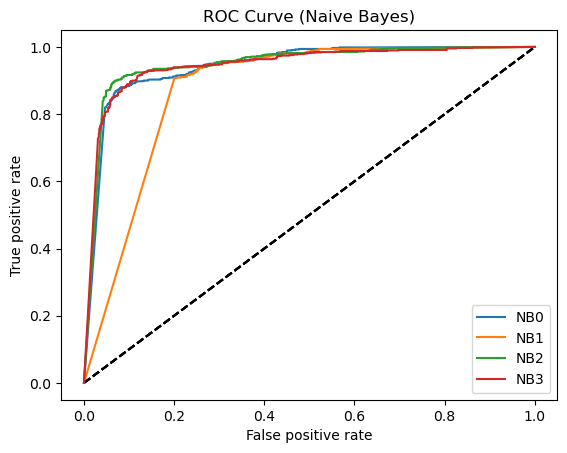

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

nb_results_tpr = [a['tpr'], b['tpr'], c['tpr'], d['tpr']]
nb_results_fpr = [a['fpr'], b['fpr'], c['fpr'], d['fpr']]
lr_results_tpr = [a1['tpr'], b1['tpr'], c1['tpr'], d1['tpr']]
lr_results_fpr = [a1['fpr'], b1['fpr'], c1['fpr'], d1['fpr']]
# Plot ROC curves for Naive Bayes
plt.figure()
for i in range(0,4):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot( nb_results_fpr[i], nb_results_tpr[i], label='NB'+str(i))
    print(metrics.auc(nb_results_fpr[i], nb_results_tpr[i]))
plt.xlabel('False positive rate')  
plt.ylabel('True positive rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend()

plt.show()

0.9651469607492532
0.9589176807167779
0.983591557690511
0.97915599457455


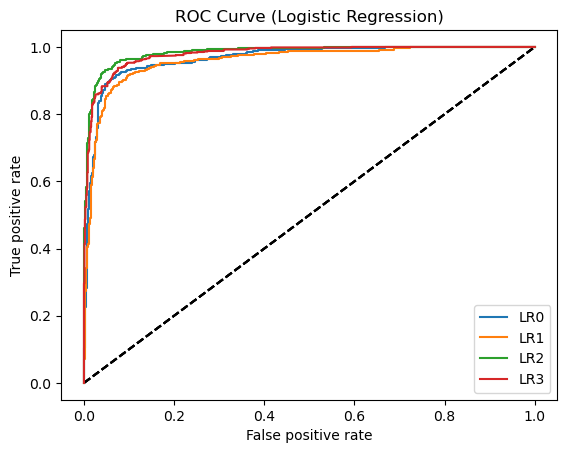

In [28]:
#Logistic
plt.figure()
for i in range(0,4):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot( lr_results_fpr[i], lr_results_tpr[i], label='LR'+str(i))
    print(metrics.auc(lr_results_fpr[i], lr_results_tpr[i]))
plt.xlabel('False positive rate')  
plt.ylabel('True positive rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()

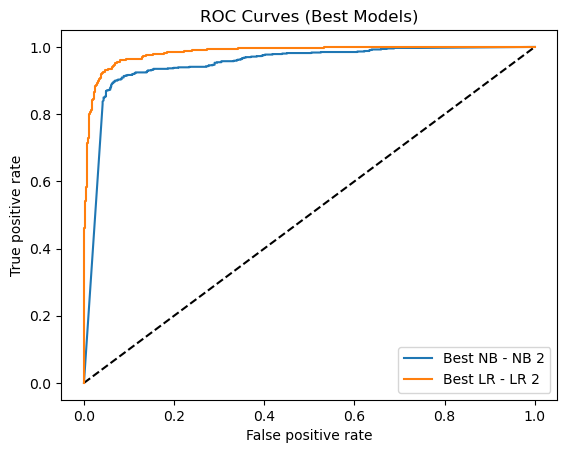

In [50]:
#best models
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(nb_results_fpr[2], nb_results_tpr[2], label='Best NB - NB 2')
plt.plot(lr_results_fpr[2], lr_results_tpr[2], label='Best LR - LR 2')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves (Best Models)')
plt.legend()


In [30]:
def generate_train_val(x, y, val_size):
    shuffle_data = np.random.permutation(len(x))
    x = np.array(x)[shuffle_data]
    y = np.array(y)[shuffle_data]
    val = int(len(x) * val_size)
    x_train, x_val = x[:-val], x[-val:]
    y_train, y_val = y[:-val], y[-val:]
    result = {
    'train_x': x_train,
    'train_y': y_train,
    'val_x': x_val, 
    'val_y': y_val
    }
    return result

In [31]:
def generate_kfold(x, y, k):
    indices = np.arange(len(x))
    fold_size = len(x) // k
#     remainder = n_samples % k
    np.random.shuffle(indices)
    folds = np.zeros(len(x))
    for i in range(k):
        start = i * fold_size
        end = (i+1) * fold_size
        fold_indices = indices[start:end]
        folds[fold_indices] = i
    remainder = len(x) % k
    remainder_indices = indices[-remainder:]
    np.random.shuffle(remainder_indices)

    for i, ids in enumerate(remainder_indices):
        folds[ids] = i % k
    return folds

In [32]:
def eval_holdout(x, y, val_size, logistic):
    
    data = generate_train_val(x, y, val_size)
    x_train, x_val = data['train_x'], data['val_x'] 
    y_train, y_val = data['train_y'], data['val_y']
    logistic.fit(x_train, y_train)
    
    train_pred = logistic.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_auc = roc_auc_score(y_train, logistic.predict_proba(x_train)[:,1])

    val_pred = logistic.predict(x_val)
    val_acc = accuracy_score(y_val, val_pred)
    val_auc = roc_auc_score(y_val, logistic.predict_proba(x_val)[:,1])
    
    results = {
    'train-acc': train_acc, 
    'train-auc': train_auc,
    'val-acc': val_acc,
    'val-auc': val_auc
    }
    
    return results

In [33]:
model = LogisticRegression()
eval_holdout(X_train_log, X_test, 0.2, model)

{'train-acc': 0.95125,
 'train-auc': 0.9861267848580885,
 'val-acc': 0.9416666666666667,
 'val-auc': 0.9793483960150626}

In [34]:
def eval_kfold(x, y, k, logistic):
    folds = generate_kfold(x, y, k)
    train_accuracies = []
    train_aucs = []
    val_accuracies= []
    val_aucs = []
    for fold in range(k):
        train_indices = folds != fold
        val_indices = folds == fold
        x_train, x_val = x[train_indices], x[val_indices] 
        y_train, y_val = y[train_indices], y[val_indices]
        logistic.fit(x_train, y_train)
        train_accuracies.append(accuracy_score(y_train, logistic.predict(x_train)))
        train_aucs.append(roc_auc_score(y_train, logistic.predict_proba(x_train)[:,1]))
        val_accuracies.append(accuracy_score(y_val, logistic.predict(x_val))) 
        val_aucs.append(roc_auc_score(y_val, logistic.predict_proba(x_val)[:,1]))
    results = {
            'train-acc': np.mean(train_accuracies), 
            'train-auc': np.mean(train_aucs),
            'val-acc' : np.mean(val_accuracies),
            'val-auc' : np.mean(val_aucs)
            }
    return results

In [35]:
model1 = LogisticRegression()
eval_kfold(X_train_log, X_test, 5, model1)

{'train-acc': 0.9492499999999999,
 'train-auc': 0.9856815737999292,
 'val-acc': 0.9416666666666667,
 'val-auc': 0.9823221900651451}

In [36]:
def eval_mccv(x, y, val_size, s, logistic):
    train_accuracies = []
    train_aucs = []
    val_accuracies= []
    val_aucs = []
    for i in range(s):
        A = eval_holdout(x, y, val_size, logistic)
        train_accuracies.append(A['train-acc'])
        train_aucs.append(A['train-auc'])
        val_accuracies.append(A['val-acc'])
        val_aucs.append(A['val-auc'])
    results = {
            'train-acc': np.mean(train_accuracies), 
            'train-auc': np.mean(train_aucs),
            'val-acc' : np.mean(val_accuracies),
            'val-auc' : np.mean(val_aucs)
            }
    return results

In [37]:
model2 = LogisticRegression()
eval_mccv(X_train_log, X_test, 0.2, 5, model2)

{'train-acc': 0.9501666666666665,
 'train-auc': 0.9860582843678791,
 'val-acc': 0.9403333333333335,
 'val-auc': 0.9799400273030041}

In [38]:
alphas = np.linspace(0.01, 10, 10)
splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for split in splits:
    for alpha in alphas:
        a = eval_holdout(X_train_log, X_test, split, LogisticRegression(penalty='l2', C = 1/ alpha))
        print("val-acc" ,a['val-acc'],"val-auc", a['val-auc'],"for split :", split, "For alpha" , alpha)
#         acc_ridge.append(res['val-acc'])
#         auc_ridge.append(res['val-auc'])

val-acc 0.95 val-auc 0.9867971124620062 for split : 0.1 For alpha 0.01
val-acc 0.9333333333333333 val-auc 0.9785624211853721 for split : 0.1 For alpha 1.12
val-acc 0.9466666666666667 val-auc 0.9649841683739989 for split : 0.1 For alpha 2.23
val-acc 0.9433333333333334 val-auc 0.98461612654321 for split : 0.1 For alpha 3.34
val-acc 0.9366666666666666 val-auc 0.9829282407407407 for split : 0.1 For alpha 4.45
val-acc 0.96 val-auc 0.9895133228466562 for split : 0.1 For alpha 5.5600000000000005
val-acc 0.9133333333333333 val-auc 0.9692398030624689 for split : 0.1 For alpha 6.67
val-acc 0.9433333333333334 val-auc 0.9823148148148148 for split : 0.1 For alpha 7.78
val-acc 0.9466666666666667 val-auc 0.9686353019686353 for split : 0.1 For alpha 8.89
val-acc 0.9366666666666666 val-auc 0.9792020373514431 for split : 0.1 For alpha 10.0
val-acc 0.955 val-auc 0.9935881481481482 for split : 0.2 For alpha 0.01
val-acc 0.9266666666666666 val-auc 0.9790001261598101 for split : 0.2 For alpha 1.12
val-acc 0

In [51]:
alphas1 = np.linspace(0.1, 1, 10)
for split in splits:
    for alpha in alphas1:
        res1 = eval_holdout(X_train_log, X_test, split, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
        print("val-acc" ,res1['val-acc'],"val-auc", res1['val-auc'],"for split :", split, "For alpha" , alpha)
#         acc_lasso.append(res1['val-acc'])
#         auc_lasso.append(res1['val-auc'])

val-acc 0.9466666666666667 val-auc 0.9875996887765026 for split : 0.1 For alpha 0.1
val-acc 0.9333333333333333 val-auc 0.9813472459485664 for split : 0.1 For alpha 0.2
val-acc 0.9633333333333334 val-auc 0.9858429858429859 for split : 0.1 For alpha 0.30000000000000004
val-acc 0.9433333333333334 val-auc 0.9848090277777777 for split : 0.1 For alpha 0.4
val-acc 0.93 val-auc 0.9785066356852407 for split : 0.1 For alpha 0.5
val-acc 0.9366666666666666 val-auc 0.9723877817098157 for split : 0.1 For alpha 0.6
val-acc 0.95 val-auc 0.9841591453306318 for split : 0.1 For alpha 0.7000000000000001
val-acc 0.9333333333333333 val-auc 0.9731385030864198 for split : 0.1 For alpha 0.8
val-acc 0.9466666666666667 val-auc 0.9693145837213634 for split : 0.1 For alpha 0.9
val-acc 0.9366666666666666 val-auc 0.9845837615621787 for split : 0.1 For alpha 1.0
val-acc 0.93 val-auc 0.9770562518216264 for split : 0.2 For alpha 0.1
val-acc 0.9366666666666666 val-auc 0.9838763297872339 for split : 0.2 For alpha 0.2
val

In [42]:

#ridge
for alpha in alphas:
# Split data
    k=2
    b = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l2', C = 1/ alpha))
    print("val-acc : " ,b['val-acc'],"val-auc : ", b['val-auc'],"for k :", k, "For alpha" , alpha)
    
for alpha in alphas:
# Split data
    k=5
    b = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l2', C = 1/ alpha))
    print("val-acc : " ,b['val-acc'],"val-auc : ", b['val-auc'],"for k :", k, "For alpha" , alpha)

for alpha in alphas:
# Split data
    k=10
    b = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l2', C = 1/ alpha))
    print("val-acc : " ,b['val-acc'],"val-auc : ", b['val-auc'],"for k :", k, "For alpha" , alpha)
    
    

val-acc :  0.933 val-auc :  0.9782456681882623 for k : 2 For alpha 0.01
val-acc :  0.9416666666666667 val-auc :  0.9809982984933945 for k : 2 For alpha 1.12
val-acc :  0.9390000000000001 val-auc :  0.9804143999679965 for k : 2 For alpha 2.23
val-acc :  0.946 val-auc :  0.982739996471611 for k : 2 For alpha 3.34
val-acc :  0.9406666666666667 val-auc :  0.9816919245147107 for k : 2 For alpha 4.45
val-acc :  0.9416666666666667 val-auc :  0.9816850401108368 for k : 2 For alpha 5.5600000000000005
val-acc :  0.9430000000000001 val-auc :  0.9820016698323661 for k : 2 For alpha 6.67
val-acc :  0.9443333333333332 val-auc :  0.980722096025421 for k : 2 For alpha 7.78
val-acc :  0.9430000000000001 val-auc :  0.9820030442768555 for k : 2 For alpha 8.89
val-acc :  0.9456666666666667 val-auc :  0.9809837856939151 for k : 2 For alpha 10.0
val-acc :  0.9390000000000001 val-auc :  0.9812859051040663 for k : 5 For alpha 0.01
val-acc :  0.9423333333333332 val-auc :  0.9819203636141808 for k : 5 For alpha

In [49]:
# Lasso
for alpha in alphas1:
# Split data
    k = 2
    c = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
    print("val-acc : " ,c['val-acc'],"val-auc : ", c['val-auc'],"for k :", k, "For alpha" , alpha)
    
for alpha in alphas1:
# Split data
    k=5
    c = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
    print("val-acc : " ,c['val-acc'],"val-auc : ", c['val-auc'],"for k :", k, "For alpha" , alpha)

for alpha in alphas1:
# Split data
    k=10
    c = eval_kfold(X_train_log, X_test, k, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
    print("val-acc : " ,c['val-acc'],"val-auc : ", c['val-auc'],"for k :", k, "For alpha" , alpha)

val-acc :  0.9363333333333334 val-auc :  0.9788917767729417 for k : 2 For alpha 0.1
val-acc :  0.9366666666666668 val-auc :  0.9807331846504936 for k : 2 For alpha 0.2
val-acc :  0.938 val-auc :  0.9781592089668998 for k : 2 For alpha 0.30000000000000004
val-acc :  0.9416666666666667 val-auc :  0.9803724328099968 for k : 2 For alpha 0.4
val-acc :  0.9376666666666666 val-auc :  0.9808540145234785 for k : 2 For alpha 0.5
val-acc :  0.9396666666666667 val-auc :  0.980328206391953 for k : 2 For alpha 0.6
val-acc :  0.9363333333333334 val-auc :  0.9807472133272941 for k : 2 For alpha 0.7000000000000001
val-acc :  0.939 val-auc :  0.9815393677135138 for k : 2 For alpha 0.8
val-acc :  0.9336666666666666 val-auc :  0.9778084406039544 for k : 2 For alpha 0.9
val-acc :  0.9363333333333334 val-auc :  0.9792525264222278 for k : 2 For alpha 1.0
val-acc :  0.9406666666666667 val-auc :  0.9815326798970571 for k : 5 For alpha 0.1
val-acc :  0.9393333333333332 val-auc :  0.9808281952335018 for k : 5 Fo

In [52]:
for split in splits:
    for alpha in alphas :
        d = eval_mccv(X_train_log, X_test, split, 5, LogisticRegression(penalty='l2', C = 1/ alpha))
        print("val-acc : " ,d['val-acc'],"val-auc : ", d['val-auc'],"for split :", split, "For alpha" , alpha)

val-acc :  0.9426666666666668 val-auc :  0.981124113080794 for split : 0.1 For alpha 0.01
val-acc :  0.9486666666666668 val-auc :  0.9825642825869053 for split : 0.1 For alpha 1.12
val-acc :  0.9446666666666668 val-auc :  0.9785120674128281 for split : 0.1 For alpha 2.23
val-acc :  0.9406666666666667 val-auc :  0.9821890894808792 for split : 0.1 For alpha 3.34
val-acc :  0.942 val-auc :  0.982658777876029 for split : 0.1 For alpha 4.45
val-acc :  0.946 val-auc :  0.9868778579300903 for split : 0.1 For alpha 5.5600000000000005
val-acc :  0.9393333333333332 val-auc :  0.9797827017346797 for split : 0.1 For alpha 6.67
val-acc :  0.95 val-auc :  0.981772894354417 for split : 0.1 For alpha 7.78
val-acc :  0.9573333333333333 val-auc :  0.9842380516732735 for split : 0.1 For alpha 8.89
val-acc :  0.9466666666666667 val-auc :  0.9820756984880503 for split : 0.1 For alpha 10.0
val-acc :  0.9390000000000001 val-auc :  0.981633708075375 for split : 0.2 For alpha 0.01
val-acc :  0.9326666666666666

In [53]:
for split in splits:
    for alpha in alphas :
        d = eval_mccv(X_train_log, X_test, split, 10, LogisticRegression(penalty='l2', C = 1/ alpha))
        print("val-acc : " ,d['val-acc'],"val-auc : ", d['val-auc'],"for split :", split, "For alpha" , alpha)

val-acc :  0.943 val-auc :  0.9858747436716513 for split : 0.1 For alpha 0.01
val-acc :  0.9443333333333334 val-auc :  0.9814428789099245 for split : 0.1 For alpha 1.12
val-acc :  0.9446666666666668 val-auc :  0.983233531185585 for split : 0.1 For alpha 2.23
val-acc :  0.9356666666666668 val-auc :  0.9814186923376751 for split : 0.1 For alpha 3.34
val-acc :  0.9390000000000001 val-auc :  0.9816232876589266 for split : 0.1 For alpha 4.45
val-acc :  0.9453333333333334 val-auc :  0.9831299726964506 for split : 0.1 For alpha 5.5600000000000005
val-acc :  0.9366666666666668 val-auc :  0.9785466722564109 for split : 0.1 For alpha 6.67
val-acc :  0.942 val-auc :  0.9805950467080866 for split : 0.1 For alpha 7.78
val-acc :  0.9476666666666669 val-auc :  0.9830755909868166 for split : 0.1 For alpha 8.89
val-acc :  0.9433333333333334 val-auc :  0.9837930452964263 for split : 0.1 For alpha 10.0
val-acc :  0.9393333333333335 val-auc :  0.9828538633448458 for split : 0.2 For alpha 0.01
val-acc :  0

In [55]:
for split in splits:
    for alpha in alphas1 :
        e = eval_mccv(X_train_log, X_test, split, 5, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
        print("val-acc : " ,e['val-acc'],"val-auc : ", e['val-auc'],"for split :", split, "For alpha" , alpha)

val-acc :  0.9340000000000002 val-auc :  0.9736247000613835 for split : 0.1 For alpha 0.1
val-acc :  0.9426666666666665 val-auc :  0.9836124138960709 for split : 0.1 For alpha 0.2
val-acc :  0.9373333333333334 val-auc :  0.9836535110682068 for split : 0.1 For alpha 0.30000000000000004
val-acc :  0.9306666666666666 val-auc :  0.9779746560162469 for split : 0.1 For alpha 0.4
val-acc :  0.9493333333333333 val-auc :  0.9850785311896795 for split : 0.1 For alpha 0.5
val-acc :  0.9493333333333334 val-auc :  0.9849001720975634 for split : 0.1 For alpha 0.6
val-acc :  0.9339999999999999 val-auc :  0.9783067136077083 for split : 0.1 For alpha 0.7000000000000001
val-acc :  0.9506666666666665 val-auc :  0.9867004538480059 for split : 0.1 For alpha 0.8
val-acc :  0.9473333333333332 val-auc :  0.9814862795949498 for split : 0.1 For alpha 0.9
val-acc :  0.9446666666666665 val-auc :  0.9835949704966913 for split : 0.1 For alpha 1.0
val-acc :  0.9403333333333332 val-auc :  0.9789691938617986 for split

In [56]:
for split in splits:
    for alpha in alphas1 :
        e = eval_mccv(X_train_log, X_test, split, 10, LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear'))
        print("val-acc : " ,e['val-acc'],"val-auc : ", e['val-auc'],"for split :", split, "For alpha" , alpha)

val-acc :  0.942 val-auc :  0.9837173833616843 for split : 0.1 For alpha 0.1
val-acc :  0.943 val-auc :  0.9806201252054821 for split : 0.1 For alpha 0.2
val-acc :  0.943 val-auc :  0.9832375512805479 for split : 0.1 For alpha 0.30000000000000004
val-acc :  0.9473333333333332 val-auc :  0.985396800346311 for split : 0.1 For alpha 0.4
val-acc :  0.9346666666666668 val-auc :  0.9783563353622847 for split : 0.1 For alpha 0.5
val-acc :  0.9436666666666668 val-auc :  0.9820789834527659 for split : 0.1 For alpha 0.6
val-acc :  0.9396666666666667 val-auc :  0.9799125150988693 for split : 0.1 For alpha 0.7000000000000001
val-acc :  0.9400000000000001 val-auc :  0.9807268975126135 for split : 0.1 For alpha 0.8
val-acc :  0.9436666666666668 val-auc :  0.9824732815120358 for split : 0.1 For alpha 0.9
val-acc :  0.9456666666666667 val-auc :  0.9825194602966416 for split : 0.1 For alpha 1.0
val-acc :  0.9446666666666668 val-auc :  0.9804123451974343 for split : 0.2 For alpha 0.1
val-acc :  0.9445 v

In [58]:
def log_lasso(trainx, trainy, testx, testy, alpha):
    model = LogisticRegression(penalty='l1', C = 1/ alpha, solver= 'liblinear')
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    results = {
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    }
    return results

In [59]:
def log_ridge(trainx, trainy, testx, testy, alpha):
    model = LogisticRegression(penalty='l2', C = 1/ alpha)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)
    test_prob = model.predict_proba(testx)[:,1]
    results = {
    'test-acc': accuracy_score(testy, test_pred),
    'test-auc': roc_auc_score(testy, test_prob),
    }
    return results

In [62]:
a = log_ridge(X_train, X_test, Y_train, Y_test, alpha = 5.56)
b = log_ridge(X_train, X_test, Y_train, Y_test, alpha = 3.34)
c = log_ridge(X_train, X_test, Y_train, Y_test, alpha = 8.89)
print(a,b,c)

{'test-acc': 0.9212991880074953, 'test-auc': 0.9648457258472434} {'test-acc': 0.9131792629606496, 'test-auc': 0.9650350044621427} {'test-acc': 0.9194253591505309, 'test-auc': 0.9650309772575704}


In [63]:
d = log_lasso(X_train, X_test, Y_train, Y_test, alpha = 0.3)
e = log_lasso(X_train, X_test, Y_train, Y_test, alpha = 0.2)
f = log_lasso(X_train, X_test, Y_train, Y_test, alpha = 0.8)
print(d,e,f)

{'test-acc': 0.9206745783885072, 'test-auc': 0.9721655728779048} {'test-acc': 0.9219237976264835, 'test-auc': 0.97181117887554} {'test-acc': 0.9219237976264835, 'test-auc': 0.9719158861944205}
